## TP2 - Estimation par intervalles

### Question 6

In [1]:
compute_confidence_intervals <- function(sample, alpha) {
  n <- length(sample)
  bar_X <- mean(sample)
  s <- sqrt(var(sample))
  
  # Interval asymptotique basé sur le TCL sans utiliser la variance
  I1 <- c(bar_X - qnorm(1 - alpha/2) * s/sqrt(n), bar_X + qnorm(1 - alpha/2) * s/sqrt(n))
  
  # Interval asymptotique basé sur le TCL en utilisant la variance
  I2 <- c(bar_X - qnorm(1 - alpha/2) * bar_X/sqrt(n), bar_X + qnorm(1 - alpha/2) * bar_X/sqrt(n))
  
  # Interval basé sur la transformation pour stabiliser la variance
  phi <- sqrt
  I3 <- c(sqrt(n) * (phi(bar_X) - phi(1)), sqrt(n) * (phi(bar_X) + phi(1)))
  
  # Interval basé sur le maximum des rapports
  F_X <- pexp
  a <- qnorm(alpha/2)
  b <- qnorm(1 - alpha/2)
  I4 <- c(F_X(b * bar_X)^n, F_X(a * bar_X)^n)
  
  # Interval basé sur la distribution gamma
  I5 <- c(n/qchisq(1 - alpha/2, df = n), n/qchisq(alpha/2, df = n))
  
  # Matrice de résultats
  result_matrix <- matrix(c(I1, I2, I3, I4, I5), ncol = 2, byrow = TRUE)
  colnames(result_matrix) <- c("Borne_inf", "Borne_sup")
  rownames(result_matrix) <- c("I1", "I2", "I3", "I4", "I5")
  
  return(result_matrix)
}

# Exemple d'utilisation
set.seed(123)  # Pour la reproductibilité des résultats
echantillon <- rexp(30, rate = 0.5)  # Exemple d'un échantillon de loi exponentielle
alpha <- 0.05
intervals <- compute_confidence_intervals(echantillon, alpha)
print(intervals)


   Borne_inf Borne_sup
I1 1.2019050  2.443053
I2 1.1703254  2.474633
I3 1.9169868 12.871438
I4 0.4252560  0.000000
I5 0.6385799  1.786696


### Question 7

In [2]:
compute_coverage_lengths <- function(n, nrep, mu, alpha) {
  couvertures <- numeric(5)
  longueurs <- numeric(5)
  
  for (i in 1:nrep) {
    # Générer un échantillon de taille n à partir d'une loi exponentielle
    echantillon <- rexp(n, rate = 1/mu)
    
    # Calculer les intervalles de confiance
    intervals <- compute_confidence_intervals(echantillon, alpha)
    
    # Vérifier la couverture empirique
    couvertures <- couvertures + (intervals[, 1] <= mu & intervals[, 2] >= mu)
    
    # Calculer les longueurs médianes des intervalles
    longueurs <- longueurs + intervals[, 2] - intervals[, 1]
  }
  
  # Calculer les pourcentages de couverture empiriques
  couvertures <- couvertures / nrep * 100
  
  # Calculer les longueurs médianes des intervalles
  longueurs <- longueurs / nrep
  
  # Retourner les résultats
  result <- list(couv = couvertures, longueur = longueurs)
  return(result)
}

# Utilisation de la fonction
n <- 30  # Taille des échantillons
nrep <- 1000  # Nombre d'échantillons à générer
mu <- 2  # Moyenne de la loi exponentielle simulée
alpha <- 0.05  # Niveau de confiance

results <- compute_coverage_lengths(n, nrep, mu, alpha)
print(results$couv)
print(results$longueur)


  I1   I2   I3   I4   I5 
91.5 92.7 35.6  0.0  0.0 
        I1         I2         I3         I4         I5 
 1.3872703  1.4353280 10.9544512 -0.5255832  1.1481158 


### Question 8

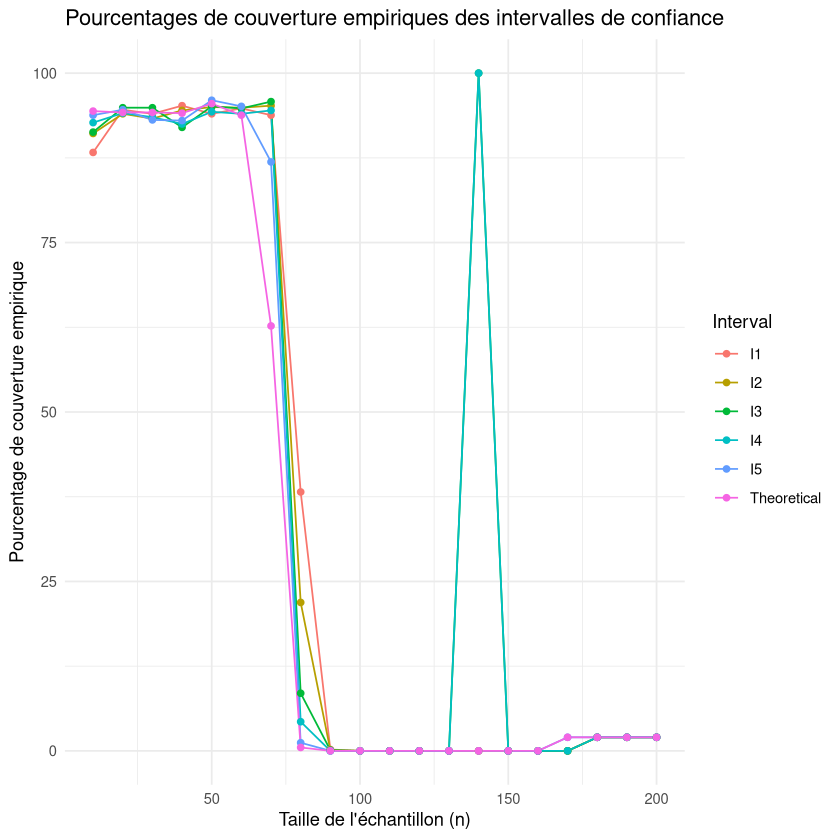

In [3]:
library(ggplot2)

# Fonction pour calculer les pourcentages de couverture empiriques
compute_coverage <- function(n, nrep, mu, alpha) {
  couvertures <- numeric(5)
  
  for (i in 1:nrep) {
    # Générer un échantillon de taille n à partir d'une loi exponentielle
    echantillon <- rexp(n, rate = 1/mu)
    
    # Calculer les intervalles de confiance
    intervals <- compute_confidence_intervals(echantillon, alpha)
    
    # Vérifier la couverture empirique
    couvertures <- couvertures + (intervals[, 1] <= mu & intervals[, 2] >= mu)
  }
  
  # Calculer les pourcentages de couverture empiriques
  couvertures <- couvertures / nrep * 100
  
  return(c(couvertures, mu))
}

# Paramètres
nrep <- 1000  # Nombre d'échantillons à générer
mu <- 2  # Moyenne de la loi exponentielle simulée
alpha <- 0.05  # Niveau de confiance

# Tailles d'échantillon à considérer
n_values <- seq(10, 200, by = 10)

# Calcul des pourcentages de couverture empiriques pour chaque taille d'échantillon
coverage_data <- t(sapply(n_values, function(n) compute_coverage(n, nrep, mu, alpha)))

# Création du dataframe pour le graphique
df <- data.frame(
  n = rep(n_values, each = 6),
  Coverage = c(coverage_data[, 1:5], rep(mu, length(n_values))),
  Interval = rep(c("I1", "I2", "I3", "I4", "I5", "Theoretical"), length(n_values))
)

# Création du graphique
ggplot(df, aes(x = n, y = Coverage, color = Interval)) +
  geom_line() +
  geom_point() +
  labs(title = "Pourcentages de couverture empiriques des intervalles de confiance",
       x = "Taille de l'échantillon (n)",
       y = "Pourcentage de couverture empirique") +
  theme_minimal()


### COMMENTAIRE

### Question 9

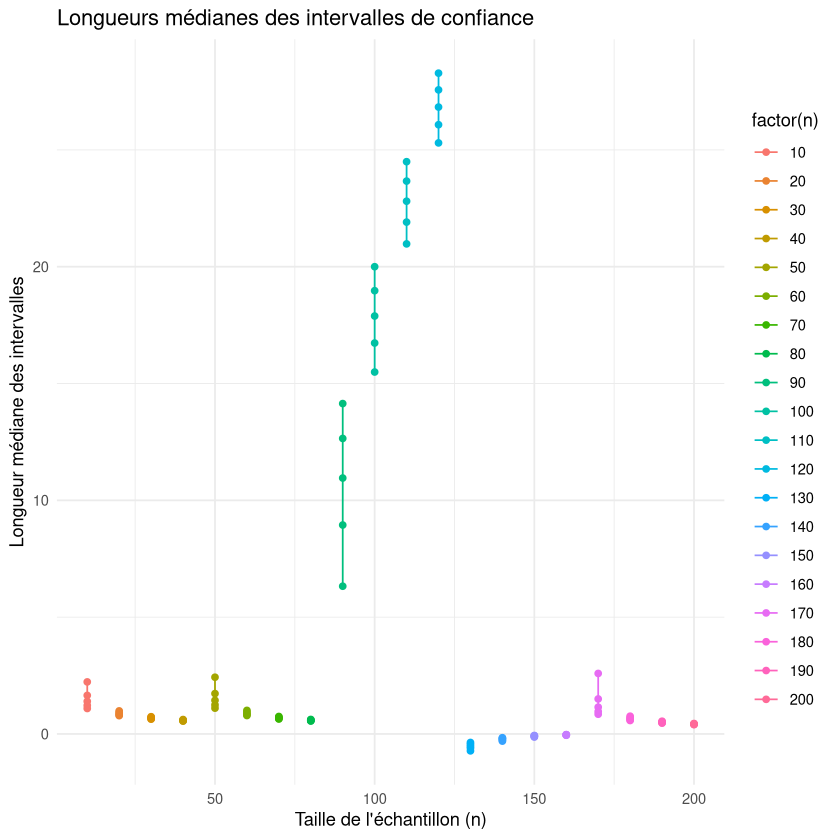

In [6]:
library(ggplot2)

# Fonction pour calculer les longueurs médianes des intervalles
compute_lengths <- function(n, nrep, mu, alpha) {
  longueurs <- numeric(5)
  
  for (i in 1:nrep) {
    # Générer un échantillon de taille n à partir d'une loi exponentielle
    echantillon <- rexp(n, rate = 1/mu)
    
    # Calculer les intervalles de confiance
    intervals <- compute_confidence_intervals(echantillon, alpha)
    
    # Calculer les longueurs médianes des intervalles
    longueurs <- longueurs + intervals[, 2] - intervals[, 1]
  }
  
  # Calculer les longueurs médianes des intervalles
  longueurs <- longueurs / nrep
  
  return(longueurs)
}

# Paramètres
nrep <- 1000  # Nombre d'échantillons à générer
mu <- 2  # Moyenne de la loi exponentielle simulée
alpha <- 0.05  # Niveau de confiance

# Tailles d'échantillon à considérer
n_values <- seq(10, 200, by = 10)

# Calcul des longueurs médianes des intervalles pour chaque taille d'échantillon
length_data <- t(sapply(n_values, function(n) compute_lengths(n, nrep, mu, alpha)))

# Création du dataframe pour le graphique
df_lengths <- data.frame(
  n = rep(n_values, each = 5),
  Length = c(length_data[, 1:5])
)

# Création du graphique
ggplot(df_lengths, aes(x = n, y = Length, group = factor(n), color = factor(n))) +
  geom_line() +
  geom_point() +
  labs(title = "Longueurs médianes des intervalles de confiance",
       x = "Taille de l'échantillon (n)",
       y = "Longueur médiane des intervalles") +
  theme_minimal()


### COMMENTAIRE